In [167]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv("segmentation data.csv")

In [169]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [170]:
df.drop(columns=['ID'],inplace=True)

In [171]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [172]:
df.shape

(2000, 7)

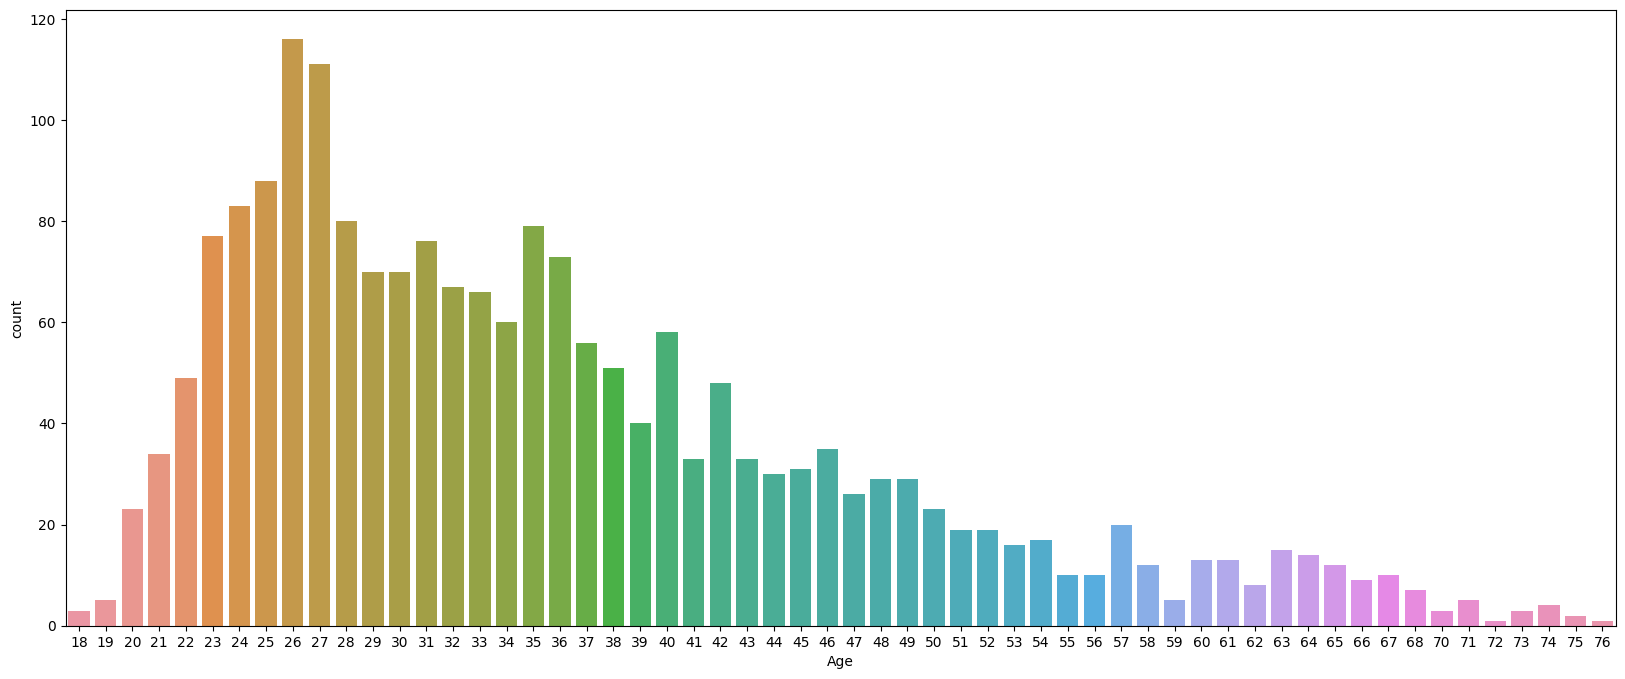

In [173]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='Age')
plt.show()

In [174]:
n_rows = 3
n_cols = 2

fig = make_subplots(rows=n_rows , cols=n_cols)
sex_counts=df['Sex'].value_counts().sort_values(ascending=True)
marital_counts=df['Marital status'].value_counts().sort_values(ascending=True)
education_counts =df['Education'].value_counts().sort_values(ascending=True)
occupation_counts=df['Occupation'].value_counts().sort_values(ascending=True)
settlement_counts=df['Settlement size'].value_counts().sort_values(ascending=True)
categorical_lst = [sex_counts,marital_counts,education_counts,occupation_counts,settlement_counts]
categorical_labels = ['Sex', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

for i,col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=categorical_lst[i].index.astype('str'),
            y=categorical_lst[i].values,
            name=col,
            text=np.round(categorical_lst[i].values,3),
            textposition='inside',
            marker_color=px.colors.sequential.Emrld,
            textfont=dict(size=10)),
        row=int(i/n_cols)+1, col=int(i%n_cols)+1
    )
    print(int(i/n_cols)+1,int(i%n_cols)+1)
fig.update_layout(
    height=800,
    title_text="Categorical Variable Distribution", 
    template='simple_white')
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

1 1
1 2
2 1
2 2
3 1


In [175]:
fig = make_subplots(rows=2, cols=2)
fig.add_trace(
    go.Histogram(x=df['Age'],name="Age Histogram",marker_color='darkgreen'),
    row=1,col=1
)
fig.add_trace(
    go.Box(x=df['Age'],name="Age Box",marker_color='darkgreen'),
    row=1,col=2
)
fig.add_trace(
    go.Histogram(x=df['Income'],name="Income Histogram",marker_color='darkgreen'),
    row=2,col=1
)
fig.add_trace(
    go.Box(x=df['Income'],name="Income Histogram",marker_color='darkgreen'),
    row=2,col=2
)
fig.update_layout(
    height=600,
    title_text="Continous Variable Distribution", 
    template='simple_white')
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

### Gender and Education

In [176]:
education_colors=['#ACDF87', 'darkgreen', 'seagreen', '#68BB59']

gender_by_education = pd.DataFrame(df.groupby('Sex')['Education'].value_counts())
fig = make_subplots(rows=1,cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
           values=[int(gender_by_education.loc[0,0]),int(gender_by_education.loc[0,1]),
                  int(gender_by_education.loc[0,2]),int(gender_by_education.loc[0,3])],
           textinfo='percent+label+value',
           name='Male',
           marker_colors=education_colors
          ),
    row=1,col=1
)
fig.add_trace(
    go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
           values=[int(gender_by_education.loc[1,0]),int(gender_by_education.loc[1,1]),
                  int(gender_by_education.loc[1,2]),int(gender_by_education.loc[1,3])],
           textinfo='percent+label+value',
           name='Female',
           marker_colors=education_colors
          ),
    row=1,col=2
)

fig.update_layout(
    height=400,
    title_text="Continous Variable Distribution", 
    template='simple_white',
     annotations=[dict(text='Male', x=0.18, y=-0.2, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=-0.2, font_size=20, showarrow=False)])
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

### Gender VS Settlement

In [177]:
education_colors=['#ACDF87', 'darkgreen', 'seagreen', '#68BB59']
gender_by_Settlement = pd.DataFrame(df.groupby('Sex')['Settlement size'].value_counts())
label=['Small City', 'Mid Sized City', 'Big City']
education_colors=['#ACDF87', 'darkgreen', 'seagreen', '#68BB59']
gender_by_education = pd.DataFrame(df.groupby('Sex')['Education'].value_counts())
fig = make_subplots(rows=1,cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(
    go.Pie(labels=label,
           values=[int(gender_by_Settlement.loc[0,0]),int(gender_by_Settlement.loc[0,1]),
                  int(gender_by_Settlement.loc[0,2])],
           textinfo='percent+label+value',
           name='Male',
           marker_colors=education_colors
          ),
    row=1,col=1
)
fig.add_trace(
    go.Pie(labels=label,
           values=[int(gender_by_Settlement.loc[1,0]),int(gender_by_Settlement.loc[1,1]),
                  int(gender_by_Settlement.loc[1,2])],
           textinfo='percent+label+value',
           name='Female',
           marker_colors=education_colors
          ),
    row=1,col=2
)

fig.update_layout(
    height=400,
    title_text="Continous Variable Distribution", 
    template='simple_white',
     annotations=[dict(text='Male', x=0.18, y=-0.2, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=-0.2, font_size=20, showarrow=False)])
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

In [178]:
education_colors=['#ACDF87', 'darkgreen', 'seagreen', '#68BB59']
gender_by_Occupation = pd.DataFrame(df.groupby('Sex')['Occupation'].value_counts())
label=['Unemployed','Employeed','high Quality Employee']
education_colors=['#ACDF87', 'darkgreen', 'seagreen', '#68BB59']
fig = make_subplots(rows=1,cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(
    go.Pie(labels=label,
           values=[int(gender_by_Occupation.loc[0,0]),int(gender_by_Occupation.loc[0,1]),
                  int(gender_by_Occupation.loc[0,2])],
           textinfo='percent+label+value',
           name='Male',
           marker_colors=education_colors
          ),
    row=1,col=1
)
fig.add_trace(
    go.Pie(labels=label,
           values=[int(gender_by_Occupation.loc[1,0]),int(gender_by_Occupation.loc[1,1]),
                  int(gender_by_Occupation.loc[1,2])],
           textinfo='percent+label+value',
           name='Female',
           marker_colors=education_colors
          ),
    row=1,col=2
)

fig.update_layout(
    height=400,
    title_text="Continous Variable Distribution", 
    template='simple_white',
     annotations=[dict(text='Male', x=0.18, y=-0.2, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=-0.2, font_size=20, showarrow=False)])
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()

In [179]:
n_rows=2 
n_cols=2
Sex_mean = df.groupby('Sex')['Income'].mean().sort_values(ascending=True)
Education_mean = df.groupby('Education')['Income'].mean().sort_values(ascending=True)
Settlement_mean = df.groupby('Settlement size')['Income'].mean().sort_values(ascending=True)
labels=[Sex_mean,Education_mean,Settlement_mean]
labels_value=['Sex','Education','Settlement']
fig = make_subplots(rows=n_rows,cols=n_cols)
for i,val in enumerate(labels_value):
    fig.add_trace(
        go.Bar( x=labels[i].index.astype('str'),
                y=labels[i].values,
                name=val,
                text=np.round(labels[i].values,3),
                textposition='inside',
                marker_color=px.colors.sequential.Emrld,
                textfont=dict(size=10)),
                row=int(i/n_cols)+1 , col =int(i%n_cols)+1
    )
fig.update_layout(
        height=700,
        title_text='Income Comparision',
        template='simple_white'
    )
fig.update_traces(
    marker_line_color='black', 
    marker_line_width=1.5, 
    opacity=0.8)
fig.show()
    


### CLUSTER MODEL

In [190]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import PowerTransformer , MinMaxScaler
from scipy import stats
import matplotlib.cm as cm

In [181]:
def normality_test(feature):
    return stats.normaltest(feature)[1]

In [182]:
def power_log_transform(feature):
    
    #power transform
    powerT = PowerTransformer().fit_transform(feature.to_numpy().reshape(-1,1))
    Power_normality = normality_test(powerT.flatten())
    
    # Log Transform
    LogT = np.log(feature)
    Log_normality = normality_test(LogT)
    return Power_normality , Log_normality

In [183]:
## Income Transform
Normal_Dist = normality_test(df['Income'])
Power_Dist , Log_Dist = power_log_transform(df['Income'])

print(f'The Normal Distribution Value for Income is: {Normal_Dist}')
print(f'The Power Distribution Value for Income is: {Power_Dist}')
print(f'The Log Distribution Value for Income is: {Log_Dist}')

The Normal Distribution Value for Income is: 2.5009638879187734e-98
The Power Distribution Value for Income is: 8.921729867143389e-07
The Log Distribution Value for Income is: 9.41366371618838e-08


### From the analysis, original, power transformed, and log transformed income distributions do NOT have normal distributions as their p-value is smaller than 0.05. However, since power transformed income distribution has the largest p-value compared to other distributions, I will power transform income distribution in preprocessing section.

In [184]:
## Age Transform
Normal_Dist = normality_test(df['Age'])
Power_Dist , Log_Dist = power_log_transform(df['Age'])

print(f'The Normal Distribution Value for Age is: {Normal_Dist}')
print(f'The Power Distribution Value for Age is: {Power_Dist}')
print(f'The Log Distribution Value for Age is: {Log_Dist}')

The Normal Distribution Value for Age is: 3.3428344869999675e-56
The Power Distribution Value for Age is: 9.92408801400393e-36
The Log Distribution Value for Age is: 7.519702564848323e-25


### From the analysis, original, power transformed, and log transformed age distributions do NOT have normal distributions as their p-value is smaller than 0.05. However, since log transformed age distribution has the largest p-value compared to other distributions, I will log transform age distribution in preprocessing section.

In [185]:
def PreProcess(df):
    
    X_features = df.copy() 
    
    # Power Transform Income, Log Transform Age 
    power_income = PowerTransformer().fit_transform(df['Income'].to_numpy().reshape(-1,1))
    power_income = pd.Series(data=power_income.flatten(), index=list(range(len(power_income.flatten()))))
    log_age = np.log(df['Age'])
    df['Power_Income'] = power_income
    df['Log_Age'] = log_age
    X_features = df.drop(columns=['Income', 'Age'], inplace=False)
    X_features.dropna(inplace=True)
    # MinMax Scaling
    scaler = MinMaxScaler()
    X_features = scaler.fit_transform(X_features)
    
    return X_features 

In [186]:
X_features = PreProcess(df)
print(df)

      Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          2  124670           1   
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1997    0               0   31          0   86400           0   
1998    1               1   24          1   97968           0   
1999    0               0   25          0   68416           0   

      Settlement size  Power_Income   Log_Age  
0                   2      0.239545  4.204693  
1                   2      0.869781  3.091042  
2                   0     -0.846121  3.891820  
3                   1      

In [191]:
def visualize_silhouette(model, cluster_lists, X_features):

    n_cols = len(cluster_lists)
    
    fig, axs = plt.subplots(figsize=(4*n_cols,4), nrows=1, ncols=n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists): 
        
        if (model=='GMM'):
            cluster =  GaussianMixture(n_components=n_cluster, random_state=0)
            cluster_labels = cluster.fit_predict(X_features)
        elif (model=='KMeans'):
            cluster = KMeans(n_clusters=n_cluster, n_init=10, max_iter=500, random_state=0)
            cluster_labels = cluster.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster: '+str(n_cluster) + ' Silhouette Score: '+ str(round(sil_avg,3)),
                           fontsize=10)
        axs[ind].set_xlabel('The silhouette coefficient value')
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort() 
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i 
            
            color=  cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_sil_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
            y_lower = y_upper + 10 
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--") 

In [192]:
def evaluate(model_labels):
    sil_avg = silhouette_score(X_features, model_labels)
    return sil_avg

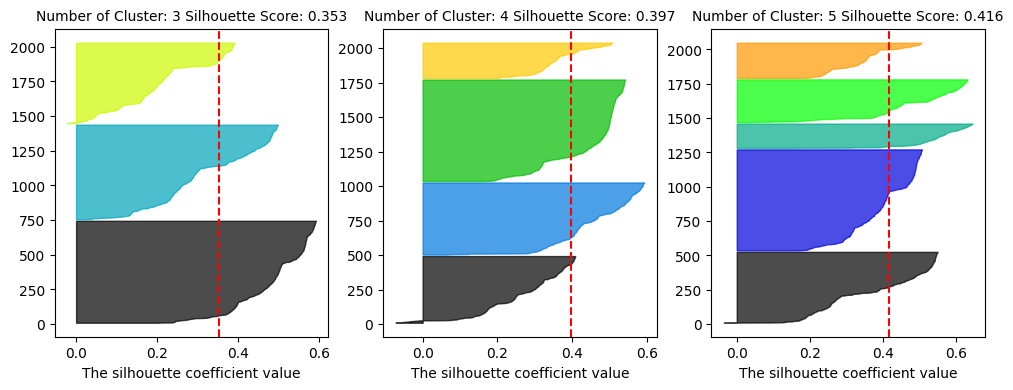

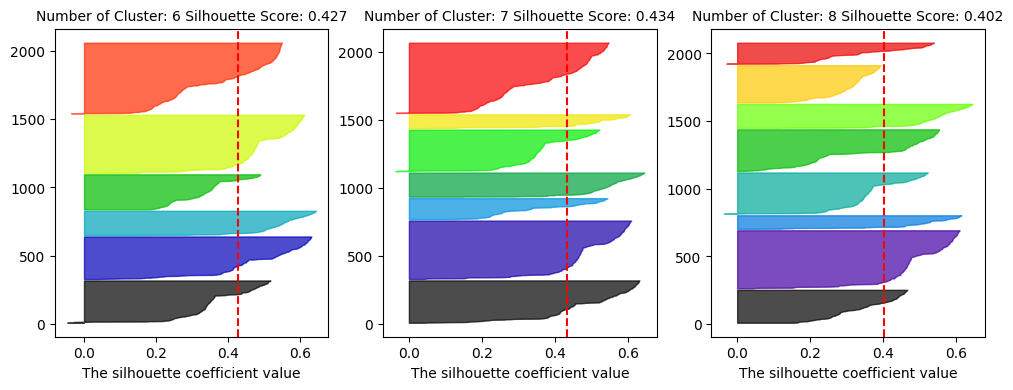

In [193]:
visualize_silhouette('KMeans', [3,4,5], X_features)
visualize_silhouette('KMeans', [6,7,8], X_features)

### The Perfect K value is 7 as it has the Best Sillhouette Score

In [194]:
kmeans = KMeans(n_clusters=7, n_init=10, max_iter=500, random_state=0)
kmeans_labels = kmeans.fit_predict(X_features)
df['kmeans_labels'] = kmeans_labels

In [195]:
print(df.head())

   Sex  Marital status  Age  Education  Income  Occupation  Settlement size  \
0    0               0   67          2  124670           1                2   
1    1               1   22          1  150773           1                2   
2    0               0   49          1   89210           0                0   
3    0               0   45          1  171565           1                1   
4    0               0   53          1  149031           1                1   

   Power_Income   Log_Age  kmeans_labels  
0      0.239545  4.204693              6  
1      0.869781  3.091042              4  
2     -0.846121  3.891820              0  
3      1.303766  3.806662              6  
4      0.830970  3.970292              6  
